<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/Onshape_GIF_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello World Onshape API
This example shows how to use Onshape's REST API to export a GIF using the mateValues api to make assemblies move, the partMetadata api to update part colors, and the assembliesShadedView api to get an image of the current view of the assembly.

Sample Onshape document: https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494

## Set up Onshape client

In [1]:
#@title Import and Setup Onshape Client

!pip install onshape-client
from onshape_client.client import Client
from onshape_client.onshape_url import OnshapeElement
import json

#@markdown Chage the base if using an enterprise (i.e. "https://ptc.onshape.com")
base = 'https://cad.onshape.com' #@param {type:"string"}

#@markdown Would you like to import your API keys from a file, or copy and paste them directly?
keyImportOption = "Upload Keys from File" #@param ["Upload Keys from File", "Copy/Paste Keys"]

from IPython.display import clear_output 
clear_output()
print("Onshape Client successfully imported!")

if keyImportOption == "Upload Keys from File":
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    execfile(fn)

  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')
else:
  access = input("Paste your Onshape Access Key: ")
  secret = input("Paste your Onshape Secret Key: ")
  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')


Onshape client configured - ready to go!


## Define Mate Motion Functions

In [ ]:
#@title Get Mates from Assembly
#@markdown Defines funciton `getAssemblyMates(url)`, which returns JSON of mates in an assembly
url = 'https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494' #@param {type:"string"}
showResponse = False #@param {type:"boolean"}

def getAssemblyMates(url):
  fixed_url = '/api/assemblies/d/did/w/wid/e/eid/matevalues'
  element = OnshapeElement(url)
  method = 'GET'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v2+json',
              'Content-Type': 'application/vnd.onshape.v2+json'}

  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  return parsed

if showResponse:
  mates = getAssemblyMates(url)
  print(json.dumps(mates, indent=4, sort_keys=True))
else:
  pass

In [26]:
#@title Set Mates in Assembly
#@markdown Defines funciton `setMateByName(url,mateName,position)`, which updates the mate with the specified name to the specified position

#@markdown URL must be to an assembly
url = 'https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494' #@param {type:"string"}
mateName = "Revolute 1" #@param {type:"string"}
position =  0.2#@param {type:"number"}
showResponse = False #@param {type:"boolean"}

def getAssemblyMates(url):
  fixed_url = '/api/assemblies/d/did/w/wid/e/eid/matevalues'
  element = OnshapeElement(url)
  method = 'GET'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v2+json',
              'Content-Type': 'application/vnd.onshape.v2+json'}

  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  return parsed

def setMateByName(url,mateName,position):
  fixed_url = '/api/assemblies/d/did/w/wid/e/eid/matevalues'
  mates = getAssemblyMates(url)
  element = OnshapeElement(url)
  

  for values in mates['mateValues']:
    if values['mateName'] == mateName:
      newMate = values
  
  if newMate['jsonType'] == 'Revolute':
    newMate['rotationZ'] = position
  elif newMate['jsonType'] == 'Slider':
    newMate['translationZ'] = position
  else:
    print('failed')
  
  method = 'POST'

  params = {}
  payload = {'mateValues':[newMate]}
  headers = {'Accept': 'application/vnd.onshape.v2+json',
              'Content-Type': 'application/vnd.onshape.v2+json'}

  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  return parsed

newMates = setMateByName(url,mateName,position)
if showResponse:
  print(json.dumps(newMates, indent=4, sort_keys=True))
else:
  pass

## Define Color Changing Functions

In [ ]:
#@title Get Parts in Document
#@markdown Function `getPartsInDocument(url: str)` returns JSON of all parts in a document
url = 'https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494' #@param {type:"string"}
showResponse = False #@param {type:"boolean"}
def getPartsInDocument(url: str):
  fixed_url = '/api/parts/d/did/w/wid'

  element = OnshapeElement(url)
  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)

  method = 'GET'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  return parsed

if showResponse:
  partResponse = getPartsInDocument(url)
  print(json.dumps(partResponse, indent=4, sort_keys=True))
else:
  pass

Run below to see all parts with their ID's and the elements they are in

In [12]:
parts = getPartsInDocument('https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494')
for i in range(len(parts)):
  print(parts[i]["name"] +" has part ID: "+ parts[i]["partId"]+" and element ID: "+parts[i]["elementId"])

Base has part ID: JHD and element ID: 0843e7f8150646db03e73871
Arm has part ID: JKD and element ID: 0843e7f8150646db03e73871
World has part ID: JHD and element ID: 8dc78e298d7af55cb4078984


In [99]:
#@title Update Part Color
#@markdown Defines funciton `updateColor(url,eid,pid,newOpacity,newColors)`, which updates the mate with the specified name to the specified position

#@markdown URL must be to an assembly
url = 'https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494' #@param {type:"string"}
#@markdown eid is the element ID of the partStudio that has the part you want to change the color of
eid = "8dc78e298d7af55cb4078984" #@param {type:"string"}
#@markdown pid is the part ID of the part you want to change the color of
pid = "JHD" #@param {type:"string"}
#@markdown newOpacity is a value from 0-255, or input -1 to keep opacity the same
newOpacity = 5 #@param {type:"number"}
#@markdown newColor is a JSON object of form `{'red': 10, 'green': 255, 'blue': 10}`, or input "none" to keep color the same
newColors = "none" #@param
showResponse = False #@param {type:"boolean"}

def updateColor(url,eid,pid,newOpacity,newColors):

  fixed_url = '/api/metadata/d/did/w/wid/e/eid/p/pid'
  element = OnshapeElement(url)
  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', eid)
  fixed_url = fixed_url.replace('pid', pid)

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}  

  response = client.api_client.request('GET', url=base + fixed_url,
  query_params=params, headers=headers, body=payload)

  partMetaData = json.loads(response.data)
  partProperties = partMetaData['properties']

  # # Print current appearance values
  # for x in partProperties:
  #   if x['name'] == "Appearance":
  #     partAppearance = x
  #     break
  # print(partAppearance['value'])

  for i in range(len(partProperties)):
    if partProperties[i]['name'] == "Appearance":
      if newOpacity == -1:
        pass
      else:
        partProperties[i]['value']['opacity'] = newOpacity
      if newColors == "none":
        pass
      else:
        partProperties[i]['value']['color'] = newColors
      break

  partMetaData['properties'] = partProperties
  payload = partMetaData

  response = client.api_client.request('POST', url=base + fixed_url,
  query_params=params, headers=headers, body=payload)
  parsed = json.loads(response.data)
  return parsed

updatedColor = updateColor(url,eid,pid,newOpacity,newColors)
if showResponse:
  print(json.dumps(updatedColor, indent=4, sort_keys=True))
else:
  pass

## Define image functions

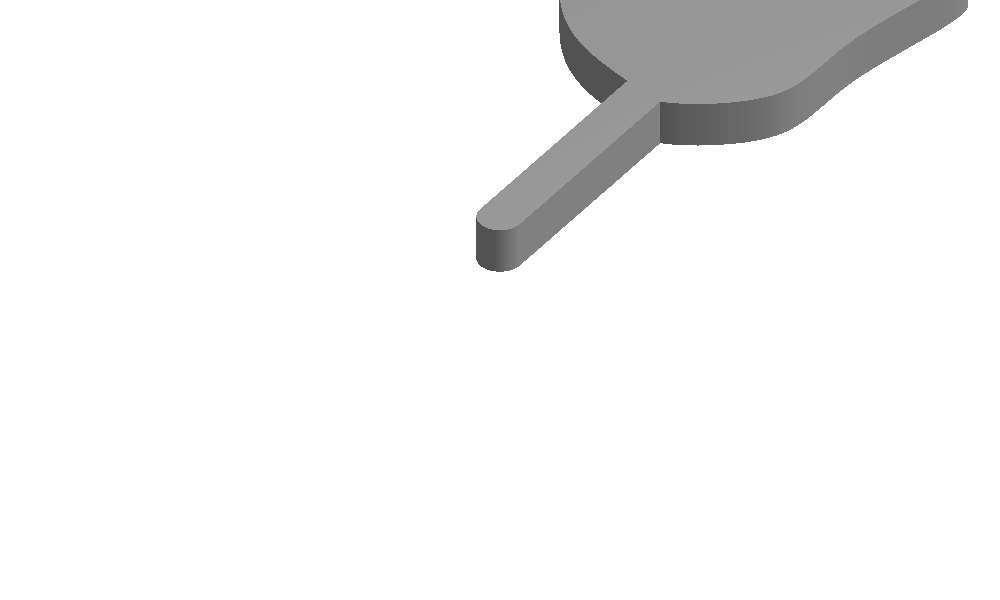

In [76]:
#@title Get Shaded View of Assembly
#@markdown Defines funciton `assembliesShadedView(url:str,viewMatrix = "front",pixelSize = 0.003,edges = "show",filename = "image.jpg")`, which returns the base64 image data of an assembly and saves the image as a jpeg called "image.jpg"

#@markdown URL must be to an assembly
url = 'https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494' #@param {type:"string"}
#@markdown viewMatrix can be any face direction or isometric as a string, or a 1x12 view matrix
viewMatrix = "isometric" #@param {type:"string"}
#@markdown pixelSize is the size in meters for each pixel. If 0, it will fill the image size output
pixelSize = 0.0005 #@param {type:"number"}
#@markdown pixelSize is the size in meters for each pixel. If 0, it will fill the image size output
edges = "hide" #@param {type:"string"}
# showImage = True #@param {type:"boolean"}

from IPython.display import Image
import base64

def assembliesShadedView(url:str,viewMatrix = "front",pixelSize = 0.003,edges = "show",filename = "image.jpg"):
  fixed_url = '/api/assemblies/d/did/w/wid/e/eid/shadedviews'
  element = OnshapeElement(url)
  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  method = 'GET'

  if any(face in viewMatrix for face in ["front","back","top","bottom","left","right"]):
    matrix = viewMatrix
  elif viewMatrix == "isometric":
    matrix = "0.612,0.612,0,0,-0.354,0.354,0.707,0,0.707,-0.707,0.707,0"
  elif isinstance(viewMatrix,list):
    matrix = str(viewMatrix).replace('[','').replace(']','')

  ## View Matrix below is roughly isometric
  params = {'viewMatrix':matrix,
            'edges':edges,
            'outputHeight':600,
            'outputWidth':1000,
            'pixelSize':pixelSize}
  # print(params)
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json',
              'Content-Type': 'application/json'}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  imgdata = base64.b64decode(parsed['images'][0])
  with open(filename, 'wb') as f:
    f.write(imgdata)
  
  return imgdata

img = assembliesShadedView(url,viewMatrix,pixelSize,edges)
Image(img)


In [44]:
#@title View Matrix Helper Functions
#@markdown Run this cell to load a library of functions for view matrices

import math
import numpy

#@markdown The function `mult(x,y)` multiplies two 4x3 view matrices to get their determinant

def mult(x,y):
  result = numpy.matmul(x,y)
  return result

#@markdown The function `IdentityTwelve()` returns a flattened identity view matrix (1x12)
def IdentityTwelve():
  m = [
      1, 0, 0, 0,
      0, 1, 0, 0,
      0, 0, 1, 0
      ]
  return m

#@markdown The function `Move(base,x1,y1,z1)` takes a 1x12 view matrix and moves the x,y,z coordinates
def Move(base,x1,y1,z1):
  matrix = base
  matrix[3] = x1
  matrix[7] = y1
  matrix[11] = z1
  return matrix

#@markdown The function `twelveToThreeByFour(matrix)` takes a flattened 1x12 view matrix and makes a 4x3 matrix for linear algrebra
def twelveToThreeByFour(matrix):
  threebyfour = [[matrix[0],matrix[1],matrix[2],matrix[3]],
                [matrix[4],matrix[5],matrix[6],matrix[7]],
                [matrix[8],matrix[9],matrix[10],matrix[11]]]
  return threebyfour

#@markdown The function `threeByFourToTwelve(matrix)` takes a 4x3 view matrix and flattens it to 1x12, the form used by Onshape
def threeByFourToTwelve(matrix):
  twelve = [matrix[0][0],matrix[0][1],matrix[0][2],matrix[0][3],
             matrix[1][0],matrix[1][1],matrix[1][2],matrix[1][3],
             matrix[2][0],matrix[2][1],matrix[2][2],matrix[2][3]]
  return twelve

def fourByFourToThreeByFour(matrix):
  matrix.pop(3)
  return matrix

#@markdown The functions `clockwiseSpinX(theta)`, `clockwiseSpinY(theta)`, and `clockwiseSpinZ(theta)` returns a 4x3 matrix with a rotation of theta around the specified axis.
def clockwiseSpinX(theta):
  m = [[1, 0, 0, 0],
       [0, math.cos(theta), math.sin(theta), 0],
       [0, -math.sin(theta), math.cos(theta), 0],
       [0, 0, 0, 1]
       ]
  return m

def clockwiseSpinY(theta):
  m = [[math.cos(theta), 0, math.sin(theta), 0],
       [0, 1, 0, 0],
       [-math.sin(theta), 0, math.cos(theta), 0],
       [0, 0, 0, 1]
       ]
  return m

def clockwiseSpinZ(theta):
  m = [[math.cos(theta), math.sin(theta), 0, 0],
       [-math.sin(theta), math.cos(theta), 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]]
  return m


Sample of how to use view matrix helper functions below

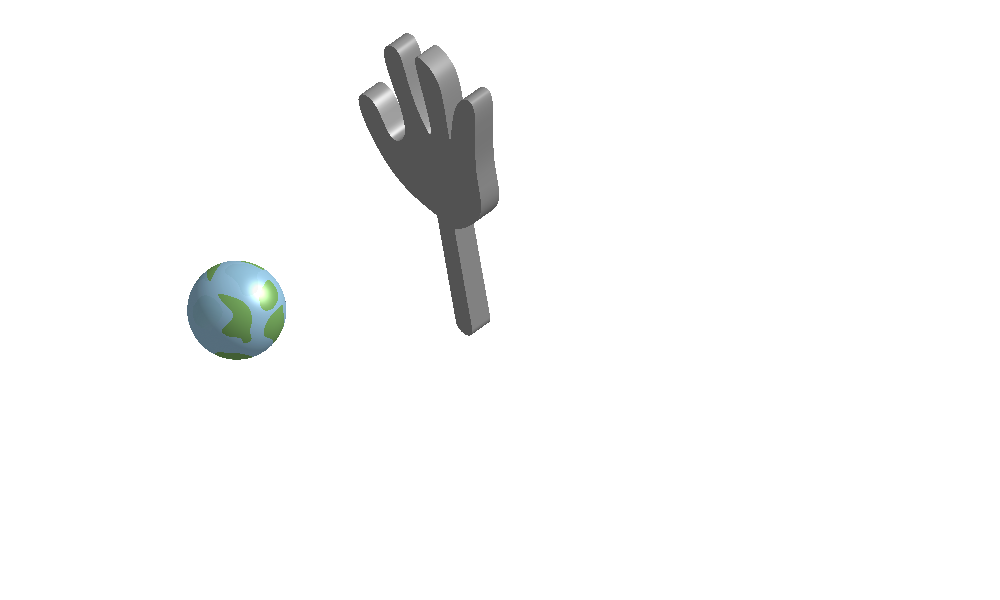

In [77]:
matrix = mult(clockwiseSpinX(-math.pi/4),clockwiseSpinY(-math.pi/4))
matrix = threeByFourToTwelve(matrix)
matrix = Move(matrix,0,0,0)
url = "https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494"
img = assembliesShadedView(url,matrix,0.001,"hide","image.jpg")
Image(img)

## Main


In [98]:
#@title Define Function for transparent background
#@markdown function `gen_frame(path)` looks for alpha chanel in image and returns in format for Imageio gif conversion
from PIL import Image as Image2

def gen_frame(path):
    im = Image2.open(path)
    alpha = im.getchannel('A')

    # Convert the image into P mode but only use 255 colors in the palette out of 256
    im = im.convert('RGB').convert('P', palette=Image2.ADAPTIVE, colors=255)

    # Set all pixel values below 5 to 255 , and the rest to 0
    mask = Image2.eval(alpha, lambda a: 255 if a <=5 else 0)

    # Paste the color of index 255 and use alpha as a mask
    im.paste(255, mask)

    # The transparency index is 255
    im.info['transparency'] = 255

    return im

Script below is a sample gif generator. Defines arrays for the positions of the revolute mates and the opacity of the world, then uses for loops to update the position/color of the mates/parts

In [101]:
import time
import imageio
import io
import numpy as np

url = "https://cad.onshape.com/documents/1e809243865e8d5244fcd096/w/d031ceaee074757da46d14b9/e/e370ef8f9ad617d9ae83f494"

images = []

matrix = mult(clockwiseSpinX(-math.pi/4),clockwiseSpinY(-math.pi/4))
matrix = threeByFourToTwelve(matrix)

revolute1Pos1 = np.arange(-0.4,0.4,0.2)
revolute1Pos2 = np.arange(0.4,-0.4,-0.2)
revolute2Pos1 = np.arange(0,2*math.pi,0.25)
colorOpacityUp = np.arange(5,255,20)
colorOpacityDown = np.arange(255,5,-20)

setMateByName(url,"Revolute 2",0)
updateColor(url,"8dc78e298d7af55cb4078984","JHD",5,"none")
assembliesShadedView(url,matrix,0.001,"hide","image.jpg")
im1 = gen_frame("image.jpg")

for i, pos in enumerate(revolute1Pos1):
  setMateByName(url,"Revolute 1",pos)
  assembliesShadedView(url,matrix,0.001,"hide","image.jpg")
  images.append(gen_frame("image.jpg"))
for i, pos in enumerate(revolute1Pos2):
  setMateByName(url,"Revolute 1",pos)
  assembliesShadedView(url,matrix,0.001,"hide","image.jpg")
  images.append(gen_frame("image.jpg"))
for i, opacity in enumerate(colorOpacityUp):
  updateColor(url,"8dc78e298d7af55cb4078984","JHD",int(opacity),"none")
  setMateByName(url,"Revolute 2",revolute2Pos1[i])
  assembliesShadedView(url,matrix,0.001,"hide","image.jpg")
  images.append(gen_frame("image.jpg"))
for i, opacity in enumerate(colorOpacityDown):
  updateColor(url,"8dc78e298d7af55cb4078984","JHD",int(opacity),"none")
  setMateByName(url,"Revolute 2",revolute2Pos1[i+len(colorOpacityUp)])
  assembliesShadedView(url,matrix,0.001,"hide","image.jpg")
  images.append(gen_frame("image.jpg"))

setMateByName(url,"Revolute 2",0)
updateColor(url,"8dc78e298d7af55cb4078984","JHD",5,"none")
images.append(gen_frame("image.jpg"))

im1 = gen_frame("image.jpg")
im1.save('OnshapeGIF.gif', save_all=True, loop = 500, append_images=images, disposal=2, duration=100)
